# EVALUACION FINAL - MODULO 3 - BEATRIZ SÁNCHEZ
## -- FASE 1: Exploración y Limpieza

In [1]:
# Importaciones de las librerías necesarias
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables y la distribución de las variables
from scipy.stats import shapiro, kstest, poisson, chisquare, ttest_ind, levene, bartlett, sem
import scipy.stats as stats
from scipy.stats import mannwhitneyu

# Pruebas y test
from itertools import combinations
from scipy.stats import shapiro, kstest

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Apertura y carga de los conjuntos de datos en DataFrames
customer_loyalty_history = pd.read_csv("Customer Loyalty History.csv")
customer_flight_activity = pd.read_csv("Customer Flight Activity.csv")

In [3]:
customer_flight_activity.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
customer_loyalty_history.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


## 1.1 Exploración Inicial:

- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.

- Une los dos conjuntos de datos de la forma más eficiente.

In [5]:
# Función creada para la realización de la exploración inicial.
def exploracion_general(dataframe):
    """Esta función proporciona una descripción personalizada de un DataFrame,
    incluyendo estadísticas descriptivas y tipos de datos de cada columna.
    
    Argumentos:
    dataframe : DataFrame de Pandas
        El DataFrame para el cual se generará la descripción
        
    La función no tiene return pero devuelve varios prints con la información necesaria:
    - describe separados por columnas numéricas y categóricas
    - dtypes por columna
    - shape
    - info
    - total de nulos
    - total de duplicados"""

    print(f"------EXPLORACIÓN DATAFRAME {dataframe}------")
    print("-------Descripción numéricas:---------")
    print(dataframe.describe())
    
    if any(dataframe.dtypes == 'object'):
        print("-------Descripción categóricas:---------")
        print(dataframe.describe(include="O"))
    else:
        print("No hay columnas categóricas en este DataFrame.")

    print("------Tipos:---------")
    print(dataframe.dtypes)
    print("------Forma del DataFrame:------")
    print(dataframe.shape)
    print("------Información:---------")
    print(dataframe.info())
    print("------Nulos:---------")
    print(dataframe.isnull().sum())
    print("------Duplicados:---------")
    print(dataframe.duplicated().sum())

def exploracion_columna(dataframe):
    for columna in list(dataframe.columns):
        print(f" \n----------- ANALIZANDO LA COLUMNA: '{columna.upper()}' -----------\n")
        print(f"* Número de datos: {len(dataframe[columna].to_list())}")
        print(f"* Frecuencia de valores en la columna: \n {dataframe[columna].value_counts()}")
        print(f"* Datos únicos en la columna: {len(dataframe[columna].unique())}")
        print(f"* Los valores son de tipo: {dataframe[columna].dtype}")
        print(f"* La suma de datos nulos: {dataframe[columna].isnull().sum()}")
        print(f"* Valores únicos: {dataframe[columna].unique()}")

# Usar la función exploracion_general con customer_loyalty_history
exploracion_general(customer_loyalty_history)

# Usar la función exploracion_columna con customer_loyalty_history
exploracion_columna(customer_loyalty_history)

# Usar la función exploracion_general con customer_flight_activity
exploracion_general(customer_flight_activity)

# Usar la función exploracion_columna con customer_flight_activity
exploracion_columna(customer_flight_activity)


------EXPLORACIÓN DATAFRAME        Loyalty Number Country          Province        City Postal Code  \
0              480934  Canada           Ontario     Toronto     M2Z 4K1   
1              549612  Canada           Alberta    Edmonton     T3G 6Y6   
2              429460  Canada  British Columbia   Vancouver     V6E 3D9   
3              608370  Canada           Ontario     Toronto     P1W 1K4   
4              530508  Canada            Quebec        Hull     J8Y 3Z5   
...               ...     ...               ...         ...         ...   
16732          823768  Canada  British Columbia   Vancouver     V6E 3Z3   
16733          680886  Canada      Saskatchewan      Regina     S1J 3C5   
16734          776187  Canada  British Columbia   Vancouver     V5R 1W3   
16735          906428  Canada             Yukon  Whitehorse     Y2K 6R0   
16736          652627  Canada          Manitoba    Winnipeg     R2C 0M5   

       Gender Education    Salary Marital Status Loyalty Card       CLV

### Identificación de posibles problemas:

Dataframe `customer_loyalty_history`:
- Valores atípicos en Salary: Existen valores negativos en la columna Salary, lo cual es inusual y podría ser un error de entrada de datos o un problema en el procesamiento de los datos.
- Datos faltantes en Salary: Hay 4238 datos faltantes en la columna Salary, lo que podría afectar el análisis si no se manejan correctamente.
- Cancelaciones con datos faltantes: Las columnas Cancellation Year y Cancellation Month tienen muchos datos faltantes (14670). Esto podría afectar cualquier análisis relacionado con la cancelación de suscripciones de los clienes en las empresas.
- Duplicados: No se encontraron datos duplicados en este conjunto de datos.
- Datos de un solo país: Todos los registros en la columna Country indican que los datos son de Canadá. Si esto no es representativo de la verdadera diversidad de la base de clientes, podría ser un problema.

In [6]:
# Valores atípicos en Salary
valores_atipicos_salario = customer_loyalty_history[customer_loyalty_history["Salary"] < 0]
print(f"Valores atípicos en Salary: {len(valores_atipicos_salario)} valores negativos encontrados.")

# Datos faltantes en Salary
datos_faltantes_salario = customer_loyalty_history["Salary"].isnull().sum()
print(f"Datos faltantes en Salary: {datos_faltantes_salario} datos faltantes encontrados.")

# Cancelaciones con datos faltantes
datos_faltantes_cancelacion = customer_loyalty_history[["Cancellation Year", "Cancellation Month"]].isnull().sum().sum()
print(f"Cancelaciones con datos faltantes: {datos_faltantes_cancelacion} datos faltantes encontrados en las columnas de cancelación.")

# Duplicados
duplicados = customer_loyalty_history.duplicated().sum()
print(f"Duplicados: {duplicados} datos duplicados encontrados.")

# Datos de un solo país
paises = customer_loyalty_history["Country"].unique()
if len(paises) == 1 and paises[0] == 'Canada':
    print("Datos de un solo país: Todos los registros son de Canadá.")
else:
    print("Datos de un solo país: No todos los registros son de Canadá.")


Valores atípicos en Salary: 20 valores negativos encontrados.
Datos faltantes en Salary: 4238 datos faltantes encontrados.
Cancelaciones con datos faltantes: 29340 datos faltantes encontrados en las columnas de cancelación.
Duplicados: 0 datos duplicados encontrados.
Datos de un solo país: Todos los registros son de Canadá.


Dataframe `customer_flight_activity`: 
- Datos duplicados: Se encontraron 1864 filas duplicadas en este conjunto de datos, lo cual podría afectar cualquier análisis que se base en la unicidad de las entradas.
- Datos de un solo año: Los datos solo abarcan los años 2017 y 2018. Si se necesita un análisis a lo largo del tiempo, esta limitación podría ser un problema.
- Alta proporción de cero en Distance: La columna Distance tiene una cantidad significativa de ceros (es de 48.81%), lo cual puede ser inusual dependiendo del contexto de los datos.
- Relación entre Points Accumulated y Points Redeemed: La descripción de la columna Points Accumulated indica que su valor máximo es 676.5, mientras que el valor máximo de Points Redeemed es 876. Esto sugiere que los puntos canjeados pueden exceder los puntos acumulados, lo cual puede ser un problema dependiendo de las reglas del programa de lealtad.

In [7]:
# Datos duplicados
duplicados = len(customer_flight_activity[customer_flight_activity.duplicated()])
print(f"Datos duplicados: Se encontraron {duplicados} filas duplicadas en este conjunto de datos.")

# Datos de un solo año
años_presentes = customer_flight_activity["Year"].unique()
print(f"Datos de un solo año: Los años presentes en los datos son {años_presentes}.")

# Alta proporción de cero en Distance
proporcion_ceros = (customer_flight_activity["Distance"] == 0).mean()
print(f"Alta proporción de cero en Distance: La proporción de ceros en la columna Distance es {proporcion_ceros:.2%}.")

# Relación entre Points Accumulated y Points Redeemed
max_accumulated_points = customer_flight_activity["Points Accumulated"].max()
max_redeemed_points = customer_flight_activity["Points Redeemed"].max()
print(f"Relación entre Points Accumulated y Points Redeemed:")
print(f"  - Valor máximo de Points Accumulated: {max_accumulated_points}")
print(f"  - Valor máximo de Points Redeemed: {max_redeemed_points}")

Datos duplicados: Se encontraron 1864 filas duplicadas en este conjunto de datos.
Datos de un solo año: Los años presentes en los datos son [2017 2018].
Alta proporción de cero en Distance: La proporción de ceros en la columna Distance es 48.81%.
Relación entre Points Accumulated y Points Redeemed:
  - Valor máximo de Points Accumulated: 676.5
  - Valor máximo de Points Redeemed: 876


In [8]:
# Unión de los dataframes utilizando el método merge de Pandas con un inner join basado en la columna clave 'Loyalty Number', ya que esta columna parece ser la clave principal que relaciona ambas tablas.
# Se podría usar también un left join, dado que se obtendría la misma solución.
merged_data = pd.merge(customer_loyalty_history, customer_flight_activity, on="Loyalty Number", how='inner')
merged_data

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,8,0,0,0,0,0.0,0,0
405620,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,9,0,0,0,0,0.0,0,0
405621,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,10,0,0,0,0,0.0,0,0
405622,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,11,0,0,0,0,0.0,0,0


1.2 Limpieza de Datos:

- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.

- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.

- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [9]:
# Verificar que no haya datos faltantes después de la unión
print("Datos faltantes en el conjunto de datos combinado:")
print(merged_data.isnull().sum())

Datos faltantes en el conjunto de datos combinado:
Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0

In [10]:
# Calcular el porcentaje de datos faltantes para cada columna
missing_percentage = (merged_data.isnull().sum() / len(merged_data)) * 100

# Imprimir el porcentaje de datos faltantes
print("Porcentaje de datos faltantes en el conjunto de datos combinado:")
print(missing_percentage)

Porcentaje de datos faltantes en el conjunto de datos combinado:
Loyalty Number                  0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.312112
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.657535
Cancellation Month             87.657535
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0

In [11]:
# Interpretación: El resultado de la verificación de datos faltantes en el conjunto de datos combinado muestra que hay valores nulos en las columnas Salary, Cancellation Year y Cancellation Month.
# - La columna Salary tiene 102672 valores nulos. Siendo un 25,31%.
# - Las columnas Cancellation Year y Cancellation Month tienen 355560 valores nulos. Siendo un 87,66%.

In [12]:
merged_data["Cancellation Year"].unique()

array([  nan, 2018., 2015., 2017., 2014., 2016., 2013.])

In [13]:
merged_data["Cancellation Year"].value_counts()

2018.0    15648
2017.0    12192
2016.0    10272
2015.0     6480
2014.0     4416
2013.0     1056
Name: Cancellation Year, dtype: int64

In [14]:
merged_data["Cancellation Month"].unique()

array([nan,  1., 12.,  4.,  2.,  7., 11.,  5.,  6., 10.,  8.,  9.,  3.])

In [15]:
merged_data["Cancellation Month"].value_counts()

11.0    5160
12.0    5112
8.0     5112
7.0     4560
10.0    4368
9.0     4224
6.0     3984
1.0     3744
3.0     3600
5.0     3576
2.0     3336
4.0     3288
Name: Cancellation Month, dtype: int64

In [16]:
# Eliminar filas con valores nulos en cualquiera de las columnas especificadas
merged_data.drop(columns=["Cancellation Year", "Cancellation Month"], inplace=True)

In [17]:
# Tras la examinación, se procede a la eliminación de las columnas "Cancellation Year", "Cancellation Month", justificación:
# - Necesidad de datos completos para el análisis temporal
# - Evitar errores en el análisis
# - Impacto mínimo en el conjunto de datos

# Se han eliminado 388887 datos de clientes que no han cancelado, representando una proporción relativamente pequeña del conjunto de datos total.
# Se ha priorizado la calidad y la integridad de los datos utilizados en el análisis puede conducir a resultados más confiables y significativos en última instancia. 

In [18]:
merged_data

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,10,6,2,8,3352,335.0,465,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2018,8,0,0,0,0,0.0,0,0
405620,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2018,9,0,0,0,0,0.0,0,0
405621,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2018,10,0,0,0,0,0.0,0,0
405622,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2018,11,0,0,0,0,0.0,0,0


In [19]:
# Tratamiento de la columna "Salary"
print(merged_data["Salary"].value_counts())
print(merged_data["Salary"].unique())

 101933.0    552
 51573.0     336
 61809.0     336
 62283.0     336
 76159.0     312
            ... 
 74431.0      24
 93296.0      24
 98020.0      24
 71960.0      24
-57297.0      24
Name: Salary, Length: 5890, dtype: int64
[ 83236.     nan 103495. ...  76178.  91970. -57297.]


In [20]:
# Imputar la media a los valores nulos en la columna 'Salary'
salary_mean = merged_data["Salary"].mean()
merged_data["Salary"] = merged_data["Salary"].fillna(salary_mean)

# Definir la función de transformación
def transformacion_salary(valor):
    if valor != np.nan:
        valor = str(valor).replace('-', '')  # Elimina los guiones
        valor = valor.split('.')[0]  # Obtiene la parte entera antes del punto
        return int(valor)
    else:
        return np.nan

# Aplicar la función de transformación a la columna 'Salary'
merged_data["Salary"] = merged_data["Salary"].apply(transformacion_salary)

# Muestra las primeras 6 filas del DataFrame para verificar los cambios
merged_data.head(6)


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016,2,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016,2,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016,2,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016,2,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016,2,2018,10,6,2,8,3352,335.0,465,38
5,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016,2,2017,5,13,4,17,3757,375.0,0,0


In [21]:
# Verificar los valores únicos después de la transformación
print("Los valores únicos son:", merged_data["Salary"].unique())
print("Los valores nulos presentes son:", merged_data["Salary"].isnull().sum())

Los valores únicos son: [ 83236  79268 103495 ...  76178  91970  57297]
Los valores nulos presentes son: 0


In [22]:
# Verificar que no haya datos faltantes después de los cambios de todo el dataframe
print("Datos faltantes en el conjunto de datos combinado después de eliminar filas y cambiar valores:", merged_data.isnull().sum())

Datos faltantes en el conjunto de datos combinado después de eliminar filas y cambiar valores: Loyalty Number                 0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64


## -- FASE 2: Visualización

Contesta a las siguientes gráficas usando la mejor gráfica que consideres:

2.1 ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

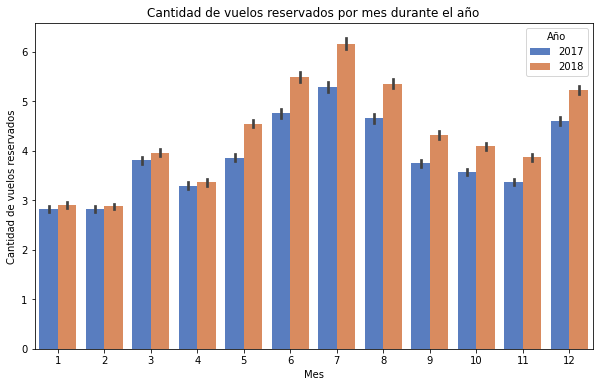

In [23]:
# Distribución de la cantidad de vuelos reservados por mes durante el año (2017, 2018)
# Opción 1: Visualización gracias a la gráfica de barras.
plt.figure(figsize=(10, 6)) # Establece el tamaño de la figura
sns.barplot(data=merged_data, x="Month", y="Flights Booked", hue="Year", palette="muted")  # Crea un gráfico de barras
plt.title("Cantidad de vuelos reservados por mes durante el año")  # Establecer el título 
plt.xlabel("Mes")  # Etiqueta del eje x
plt.ylabel("Cantidad de vuelos reservados")  # Etiqueta del eje y
plt.legend(title="Año")  # Agregar la leyenda para indicar la cantidad de vuelos reservados por año
plt.show() # Mostrar el gráfico

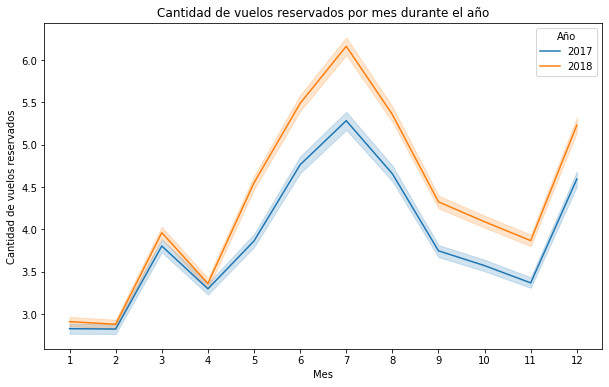

In [24]:
# Opción 2: para una mayor visulización de la tendencia. 
# Crear un gráfico de líneas para mostrar la cantidad de vuelos reservados por mes durante el año
plt.figure(figsize=(10, 6)) # Establece el tamaño de la figura
sns.lineplot(data=merged_data, x="Month", y="Flights Booked", hue="Year", palette="tab10")  # Crea un gráfico de líneas
plt.title("Cantidad de vuelos reservados por mes durante el año")  # Establecer el título 
plt.xlabel("Mes")  # Etiqueta del eje x
plt.ylabel("Cantidad de vuelos reservados")  # Etiqueta del eje y
plt.xticks(range(1, 13))  # Ajustar los marcadores del eje x para mostrar cada mes (todos)
plt.legend(title="Año")  # Agregar la leyenda para indicar el año correspondiente a cada línea
plt.show() # Mostrar el gráfico


In [25]:
# Uso de gráfica: barplot o gráfica de barras/ lineplot o grafica de lineas
# Interpretación: Esta gráfica muestra la cantidad de vuelos reservados por mes durante los años 2017 y 2018. 
#                 Se observa que el número de vuelos reservados varía a lo largo del año, mostrando picos más altos en algunos mes (Marzo y Agosto).
#                 Además, se puede observar una tendencia general ascendente de mayor número de vuelos reservados durante los meses de verano. Y mayor por lo general durante el año 2018.
# Conclusión: El análisis de la distribución mensual de los vuelos reservados puede proporcionar información útil para la planificación y gestión de recursos en la industria de la aviación,
#             así como para comprender los patrones de viaje de los clientes.

2.2 ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

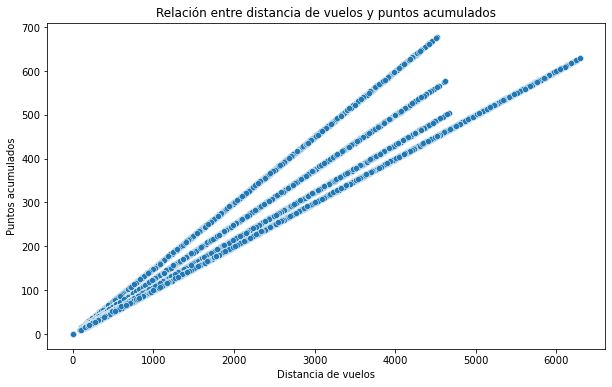

In [26]:
# Relación entre la distancia de los vuelos y los puntos acumulados por los clientes
plt.figure(figsize=(10, 6)) # Establece el tamaño de la figura
sns.scatterplot(data=merged_data, x="Distance", y="Points Accumulated")  # Crea un gráfico de dispersión con los datos de distancia y puntos acumulados
plt.title("Relación entre distancia de vuelos y puntos acumulados")  # Establece el título del gráfico
plt.xlabel("Distancia de vuelos")  # Etiqueta del eje x
plt.ylabel("Puntos acumulados")  # Etiqueta del eje y
plt.show() # Muestra el gráfico

In [27]:
# Uso de gráfica: scatterplot o gráfico de dispersión.
# Interpretación: Esta gráfica de dispersión muestra la relación entre la distancia de los vuelos y los puntos acumulados por los clientes.
#                 Cada punto en el gráfico representará un cliente, y su posición en el gráfico mostrará cuántos puntos han acumulado en relación con la distancia de sus vuelos.
# Conclusión: Puesto que las líneas son ascendentes, significa que hay una tendencia positiva entre la distancia de los vuelos y los puntos acumulados.
#             Es decir, a medida que la distancia de los vuelos aumenta, también lo hacen los puntos acumulados.

2.3 ¿Cuál es la distribución de los clientes por provincia o estado?

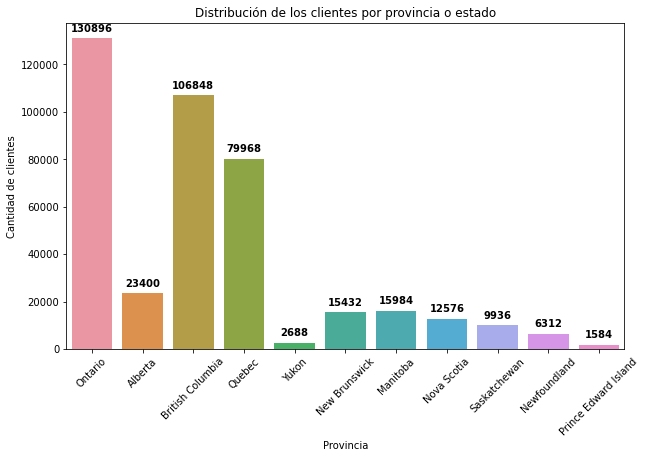

In [28]:
# Distribución de los clientes por provincia o estado
plt.figure(figsize=(10, 6))  # Establece el tamaño de la figura
ax = sns.countplot(data=merged_data, x="Province")  # Crea un gráfico de recuento (countplot) utilizando los datos de la columna "Province"
plt.title("Distribución de los clientes por provincia o estado")  # Establece el título del gráfico
plt.xlabel("Provincia")  # Etiqueta del eje x
plt.ylabel("Cantidad de clientes")  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mayor legibilidad

# Agregar etiquetas encima de las barras
for indice, valor in enumerate(ax.patches):  # Itera sobre las barras del gráfico
    plt.text(indice, valor.get_height() + 3000, str(int(valor.get_height())),  # Agrega texto sobre cada barra indicando la cantidad de clientes
             horizontalalignment="center", fontweight="bold")  # Alinea el texto al centro y lo hace negrita
    
plt.show()  # Muestra el gráfico

In [29]:
# Uso de gráfica: countplot o gráfica de barras.
# Interpretación: Esta gráfica muestra la cantidad de clientes en cada provincia o estado. Cada barra representa una provincia o estado, y la altura de la barra indica el número de clientes en esa ubicación.
# Conclusión: Observamos la distribución geográfica de los clientes, ayuda a identificar áreas con mayor concentración de clientes (Ontario, British Columbia y Quebec) y dirigir estrategias de marketing o servicio al cliente en consecuencia.

2.4 ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [30]:
merged_data["Education"].value_counts()

Bachelor                253752
College                 102672
High School or Below     19008
Doctor                   17856
Master                   12336
Name: Education, dtype: int64

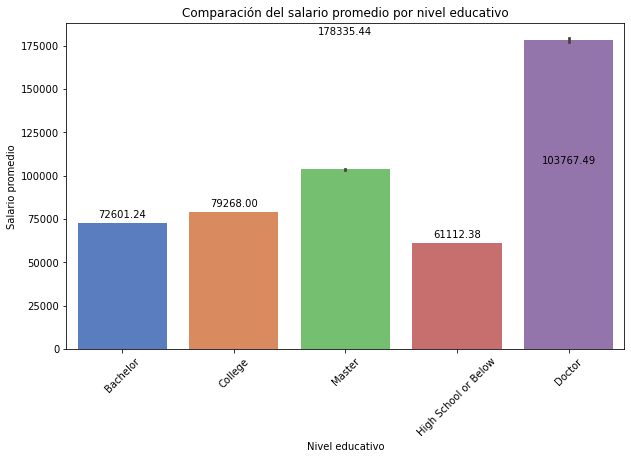

In [31]:
# Comparación del salario promedio entre los diferentes niveles educativos de los clientes
plt.figure(figsize=(10, 6))  # Establece el tamaño de la figura
sns.barplot(data=merged_data, x="Education", y="Salary", estimator=np.mean, palette="muted")  # Gráfica de barras con el salario promedio por nivel educativo
plt.title("Comparación del salario promedio por nivel educativo")  # Título del gráfico
plt.xlabel("Nivel educativo")  # Etiqueta del eje x
plt.ylabel("Salario promedio")  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotación de las etiquetas del eje x para una mejor visualización

for index, value in enumerate(merged_data.groupby("Education")["Salary"].mean()):
    plt.text(index, value + 2000, f"{value:.2f}", ha="center", va="bottom", fontsize=10)
    
plt.show() # Muestra el gráfico


In [32]:
# Interpretación: Este gráfico de barras compara el salario promedio entre diferentes niveles educativos de los clientes. Cada barra representa un nivel educativo, y la altura de la barra indica el salario promedio de los clientes en ese nivel.
# Conclusión: Se observa una variación en el salario promedio según el nivel educativo, lo que puede tener implicaciones en términos de poder adquisitivo y comportamiento del consumidor.
#             Se observa que los clientes con educación de "Doctor" y "Master" tienen los salarios promedio más altos, mientras que aquellos con educación de "High School or Below" tienen los salarios promedio más bajos.
#             Aquellos con educación universitaria avanzada pueden tener acceso a trabajos mejor remunerados.

2.5 ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

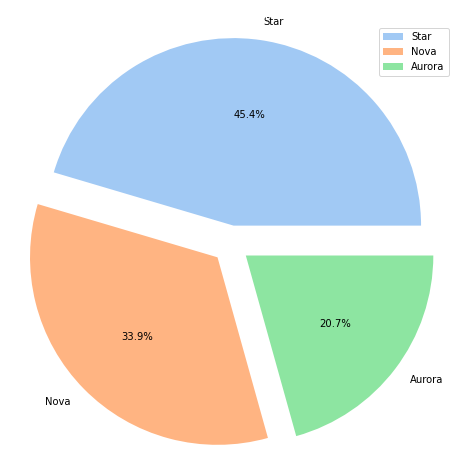

In [33]:
# Proporción de clientes con diferentes tipos de tarjetas de fidelidad
labels = merged_data["Loyalty Card"].value_counts().index  # Datos
sizes = merged_data["Loyalty Card"].value_counts().values

colors = sns.color_palette("pastel")  # Uso de colores pastel
explode = (0.1, 0.1, 0.1)  # Separación de los quesitos
plt.figure(figsize=(8, 8))  # Crear el gráfico de pastel
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", explode=explode)
plt.legend(labels, loc="upper right")  # Añadir leyenda
plt.axis("equal")  # Asegura que el gráfico sea un círculo
plt.title("Proporción de clientes con diferentes tipos de tarjetas de fidelidad", color="white")  # Título
plt.show()  # Mostrar el gráfico

In [34]:
# Uso de gráfica: Pieplot o gráfico de quesitos
# Interpretación: Este gráfico circular muestra la proporción de clientes que tienen diferentes tipos de tarjetas de fidelidad.
#                 Cada porción del círculo representa un tipo de tarjeta de fidelidad, y el valor porcentual indica la proporción de clientes con esa tarjeta.
# Conclusión: Podemos ver la distribución de la base de clientes en función de los diferentes programas de fidelización, siendo tres (Star, Nova y Aurora), lo que puede ser útil para comprender la efectividad de cada programa.
#             Observamos como hay un mayor número de clientes en el programa/tarjeta de fidelidad Star con un 45,4%, seguido de la tarjeta Nova con 33,9% y la tarjeta Aurora con un 20,7%. 

2.6 ¿Cómo se distribuyen los clientes según su estado civil y género?

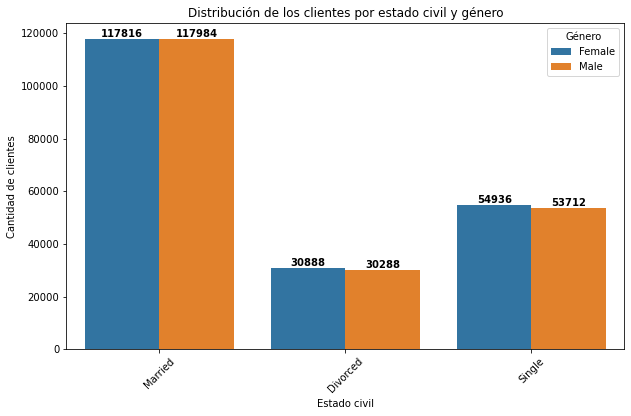

In [35]:
# Distribución de los clientes según su estado civil y género
plt.figure(figsize=(10, 6))  # Establece el tamaño de la figura
ax = sns.countplot(data=merged_data, x="Marital Status", hue="Gender")  # Crear el gráfico de conteo
plt.title("Distribución de los clientes por estado civil y género")  # Título del gráfico
plt.xlabel("Estado civil")  # Etiqueta del eje X
plt.ylabel("Cantidad de clientes")  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotación de las etiquetas del eje x para una mejor visualización
plt.legend(title="Género")  # Establece una leyenda


for p in ax.patches: # Añadir el número total encima de cada barra
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="bottom", fontsize=10, color="black", fontweight="bold")
plt.show() # Muestra el gráfico

In [36]:
# Interpretación: Este gráfico de barras apiladas muestra la distribución de los clientes según su estado civil y género.
#                 Cada barra representa un estado civil(siendo tres: casado, divorciado y soltero), dividido en segmentos según el género de los clientes.
# Conclusión: Se puede observar la distribución de género dentro de cada categoría de estado civil, lo que puede proporcionar información sobre la demografía de la base de clientes.
#             Esta información puede ser útil para orientar estrategias de marketing o servicios específicos dirigidos a segmentos de clientes según su estado civil.
#             Observamos que el mayor número de clientes se encuentra en la categoría de "Casado", seguido por "Soltero" y "Divorciado". Dentro de cada estado civil, no parece haber una gran diferencia en la cantidad de clientes entre hombres y mujeres.

BONUS: 2.7 ¿Existe alguna relación entre el salario de los clientes y su valor vitalicio? ¿Esta relación varía según el género?

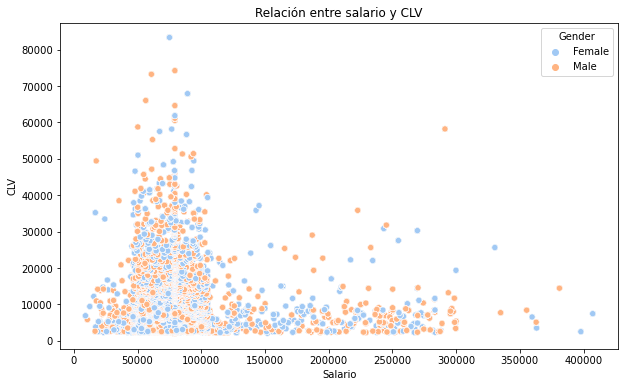

In [37]:
# Relación entre el salario y el CLV (valor vitalicio del cliente):
plt.figure(figsize=(10, 6))  # Establece el tamaño de la figura
sns.scatterplot(data=merged_data, x="Salary", y="CLV", hue="Gender", palette="pastel")  # Diagrama de dispersión para visualizar la relación entre el salario y el CLV, diferenciado por género
plt.title("Relación entre salario y CLV")  # Título del gráfico
plt.xlabel("Salario")  # Etiqueta del eje x
plt.ylabel("CLV")  # Etiqueta del eje y
plt.show()  # Muestra el gráfico

In [38]:
# Interpretación: No se observa una clara relación entre el salario de los clientes y su valor vitalicio.
# Conclusión: Esto sugiere que el poder adquisitivo individual no es el único determinante del valor que un cliente aporta a la empresa.
#             Destaca la importancia de comprender y satisfacer las necesidades específicas de cada segmento de clientes.

2.8 ¿Cómo se distribuye el salario entre diferentes niveles educativos y géneros?

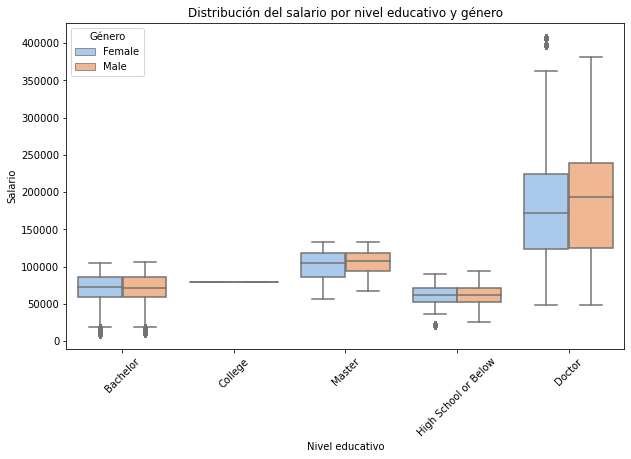

In [39]:
# Distribución del salario por nivel educativo y género:
plt.figure(figsize=(10, 6))  # Establece el tamaño de la figura
sns.boxplot(data=merged_data, x="Education", y="Salary", hue="Gender", palette="pastel")  # Diagrama de caja para visualizar la distribución del salario por nivel educativo y género
plt.title("Distribución del salario por nivel educativo y género")  # Título del gráfico
plt.xlabel("Nivel educativo")  # Etiqueta del eje x
plt.ylabel("Salario")  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotación de las etiquetas del eje x para una mejor visualización
plt.legend(title="Género")  # Agrega la leyenda
plt.show()  # Muestra el gráfico

In [40]:
# Interpretación: La distribución del salario varía entre los diferentes niveles educativos y géneros.
#               Observamos que ciertos niveles educativos y géneros tienden a tener salarios más altos en comparación con otros. Como son "Doctor" el más elevado y el menor "High School".
#               Además, se ve mayor diferencia en los géneros tanto en el nivel educativo "Master" como "Doctor". 
#               Gracias a esta gráfica obervamos la mediana de cada caja, además de los valores atipicos o outliers y los cuatriles.
# Conclusión: Esta información puede ser útil para identificar disparidades salariales y diseñar políticas que promuevan la equidad salarial en la organización.

## -- Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Objetivo del Ejercicio: Se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:

3.1 Preparación de Datos:

- Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [41]:
relevant_columns = ["Flights Booked", "Education"]
flight_education_data = merged_data[relevant_columns]
flight_education_data

,Flights Booked,Education
0,0,Bachelor
1,3,Bachelor
2,0,Bachelor
3,0,Bachelor
4,6,Bachelor
...,...,...
405619,0,Bachelor
405620,0,Bachelor
405621,0,Bachelor
405622,0,Bachelor


3.2 Análisis Descriptivo:

- Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

In [42]:
education_group = flight_education_data.groupby("Education")["Flights Booked"].describe()
education_group

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,253752.0,4.091093,5.216995,0.0,0.0,1.0,8.0,21.0
College,102672.0,4.153012,5.242136,0.0,0.0,1.0,8.0,21.0
Doctor,17856.0,4.146281,5.250093,0.0,0.0,1.0,8.0,21.0
High School or Below,19008.0,4.155777,5.234551,0.0,0.0,1.0,8.0,21.0
Master,12336.0,4.184014,5.210294,0.0,0.0,1.0,8.0,21.0


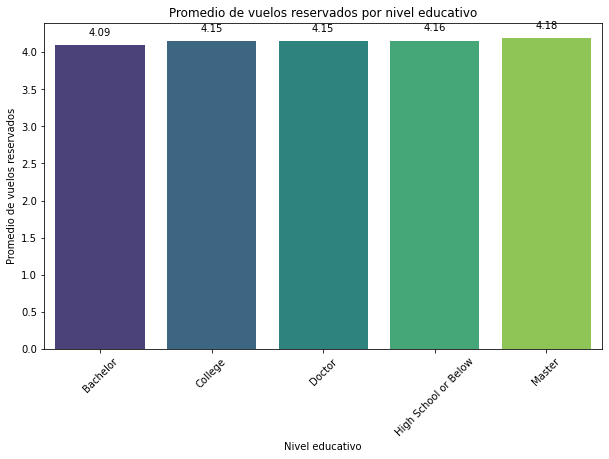

In [43]:
plt.figure(figsize=(10, 6)) # Establece el tamaño de la figura
sns.barplot(x=education_group.index, y=education_group["mean"], palette="viridis") # Crear el gráfico de barras
plt.title("Promedio de vuelos reservados por nivel educativo") # Título del gráfico
plt.xlabel("Nivel educativo")  # Etiqueta del eje x
plt.ylabel("Promedio de vuelos reservados") # Etiqueta del eje y
plt.xticks(rotation=45) # Rotar las etiquetas del eje x para una mejor visualización

for index, value in enumerate(education_group["mean"]):# Agregar etiquetas numéricas en la parte superior de cada barra
    plt.text(index, value + 0.1, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.show() # Mostrar el gráfico 

In [44]:
# Agrupación mediante el método de agrupación gropuby y el método describe() para obtener las estadisticas descriptivas básicas 

In [45]:
# Calcular las estadisticas descriptivas básicas de forma individual
# Agrupar los datos por nivel educativo
education_groups = flight_education_data.groupby("Education")["Flights Booked"]

# Calcular el promedio para cada grupo
average_flights = education_groups.mean()
print("Promedio de vuelos reservados por nivel educativo:", average_flights)

# Calcular la desviación estándar para cada grupo
std_dev_flights = education_groups.std()
print("\nDesviación estándar de vuelos reservados por nivel educativo:", std_dev_flights)

# Calcular percentiles para cada grupo (25%, 50%, 75%)
percentiles_flights = education_groups.quantile([0.25, 0.5, 0.75])
print("\nPercentiles de vuelos reservados por nivel educativo:", percentiles_flights)

# Calcular la mediana para cada grupo
median_flights = education_groups.median()
print("\nMediana de vuelos reservados por nivel educativo:", median_flights)

Promedio de vuelos reservados por nivel educativo: Education
Bachelor                4.091093
College                 4.153012
Doctor                  4.146281
High School or Below    4.155777
Master                  4.184014
Name: Flights Booked, dtype: float64

Desviación estándar de vuelos reservados por nivel educativo: Education
Bachelor                5.216995
College                 5.242136
Doctor                  5.250093
High School or Below    5.234551
Master                  5.210294
Name: Flights Booked, dtype: float64

Percentiles de vuelos reservados por nivel educativo: Education                 
Bachelor              0.25    0.0
                      0.50    1.0
                      0.75    8.0
College               0.25    0.0
                      0.50    1.0
                      0.75    8.0
Doctor                0.25    0.0
                      0.50    1.0
                      0.75    8.0
High School or Below  0.25    0.0
                      0.50    1.0
      

In [46]:
# Interpretación:
# - Promedio de vuelos reservados por nivel educativo: Se observa que el promedio de vuelos reservados por cliente es similar entre los diferentes niveles educativos, con valores cercanos a 4.
#      Sugiere que, en promedio, los clientes realizan una cantidad similar de reservas de vuelos independientemente de su nivel educativo.
# - Desviación estándar de vuelos reservados por nivel educativo: la desviación estándar de vuelos reservados por nivel educativo muestra la dispersión de los datos en torno al promedio de vuelos reservados en cada grupo educativo.
#      Encontramos que la desviación estándar es similar entre los diferentes niveles educativos, lo que indica una variabilidad consistente en la cantidad de vuelos reservados independientemente del nivel educativo.
# - Percentiles de vuelos reservados por nivel educativo: Los percentiles muestran la distribución del número de vuelos reservados dentro de cada grupo educativo.
#      Por ejemplo, el 25% de los clientes con educación de nivel "Bachelor" no han reservado ningún vuelo, mientras que el 75% ha reservado hasta 8 vuelos. Este patrón se repite en los otros niveles educativos.
# - Mediana de vuelos reservados por nivel educativo: La mediana del número de vuelos reservados por nivel educativo es 1 para todos los grupos educativos.
#      Sugiere que la mitad de los clientes en cada nivel educativo han reservado 1 vuelo o menos, mientras que la otra mitad ha reservado más de un vuelo.

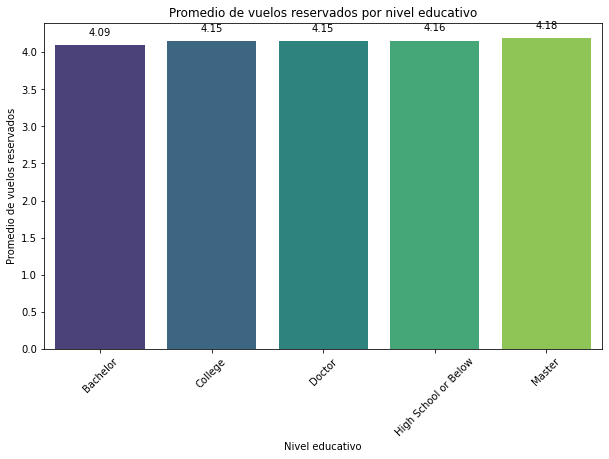

Promedio de vuelos reservados por nivel educativo:
 Education
Bachelor                4.091093
College                 4.153012
Doctor                  4.146281
High School or Below    4.155777
Master                  4.184014
Name: Flights Booked, dtype: float64

Desviación estándar de vuelos reservados por nivel educativo:
 Education
Bachelor                5.216995
College                 5.242136
Doctor                  5.250093
High School or Below    5.234551
Master                  5.210294
Name: Flights Booked, dtype: float64

Percentiles de vuelos reservados por nivel educativo:
 Education                 
Bachelor              0.25    0.0
                      0.50    1.0
                      0.75    8.0
College               0.25    0.0
                      0.50    1.0
                      0.75    8.0
Doctor                0.25    0.0
                      0.50    1.0
                      0.75    8.0
High School or Below  0.25    0.0
                      0.50    1.0
   

In [47]:
def ab_testing_flight_bookings(flight_data):
    """
    Realiza un análisis descriptivo y un gráfico de barras para comparar el promedio de vuelos reservados
    por nivel educativo en un DataFrame de datos de vuelos.

    Parámetros:
        flight_data (DataFrame): DataFrame que contiene los datos de vuelos y niveles educativos.

    Retorna:
        None: Muestra un gráfico de barras y estadísticas descriptivas por nivel educativo.
    """
    # Calcular estadísticas descriptivas por nivel educativo
    education_group = flight_data.groupby("Education")["Flights Booked"].describe()

    # Mostrar el gráfico de barras
    plt.figure(figsize=(10, 6))  # Establece el tamaño de la figura
    sns.barplot(x=education_group.index, y=education_group["mean"], palette="viridis")  # Crear el gráfico de barras
    plt.title("Promedio de vuelos reservados por nivel educativo")  # Título del gráfico
    plt.xlabel("Nivel educativo")  # Etiqueta del eje x
    plt.ylabel("Promedio de vuelos reservados")  # Etiqueta del eje y
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización

    # Agregar etiquetas numéricas en la parte superior de cada barra
    for index, value in enumerate(education_group["mean"]):
        plt.text(index, value + 0.1, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

    plt.show()  # Mostrar el gráfico

    # Calcular estadísticas descriptivas básicas de forma individual
    # Agrupar los datos por nivel educativo
    education_groups = flight_data.groupby("Education")["Flights Booked"]

    # Calcular el promedio para cada grupo
    average_flights = education_groups.mean()
    print("Promedio de vuelos reservados por nivel educativo:\n", average_flights)

    # Calcular la desviación estándar para cada grupo
    std_dev_flights = education_groups.std()
    print("\nDesviación estándar de vuelos reservados por nivel educativo:\n", std_dev_flights)

    # Calcular percentiles para cada grupo (25%, 50%, 75%)
    percentiles_flights = education_groups.quantile([0.25, 0.5, 0.75])
    print("\nPercentiles de vuelos reservados por nivel educativo:\n", percentiles_flights)

    # Calcular la mediana para cada grupo
    median_flights = education_groups.median()
    print("\nMediana de vuelos reservados por nivel educativo:\n", median_flights)

# Llamada a la función
ab_testing_flight_bookings(flight_education_data)

3.3 Prueba Estadística:

- Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

1. Preparación de los datos:

In [48]:
# Filtrar columnas relevantes
flight_education_data = flight_education_data[['Flights Booked', 'Education']]
flight_education_data

,Flights Booked,Education
0,0,Bachelor
1,3,Bachelor
2,0,Bachelor
3,0,Bachelor
4,6,Bachelor
...,...,...
405619,0,Bachelor
405620,0,Bachelor
405621,0,Bachelor
405622,0,Bachelor


2. Formulación de hipótesis:
- Hipótesis nula (H0): No hay diferencias significativas en el número de vuelos reservados entre los diferentes niveles educativos.
- Hipótesis alternativa (H1): Existen diferencias significativas en el número de vuelos reservados entre los diferentes niveles educativos.

In [49]:
# Observación de la columna "Flights Booked"
print(merged_data["Flights Booked"].value_counts())
print(merged_data["Flights Booked"].unique())

0     197992
3      18228
11     15705
5      15084
7      14561
8      14357
9      14164
6      13847
2      13641
10     13363
4      12821
1      12667
13     10782
12     10382
14      7057
15      6582
16      4354
17      3899
18      2958
19      1496
20      1156
21       528
Name: Flights Booked, dtype: int64
[ 0  3  6 13 12  8 14  2  1  7 15  4  9 16 11  5 10 17 18 19 20 21]


In [50]:
print(merged_data["Education"].value_counts())
print(merged_data["Education"].unique())

Bachelor                253752
College                 102672
High School or Below     19008
Doctor                   17856
Master                   12336
Name: Education, dtype: int64
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']


3. Agrupación de Niveles educativos:

In [51]:
# Definir niveles educativos para educación superior y educación básica
levels_superior_education = flight_education_data[(flight_education_data['Education'] == 'College') | (flight_education_data['Education'] == 'Doctor')| (flight_education_data['Education'] == 'Master')]
levels_basic_education = flight_education_data[(flight_education_data['Education'] == 'High School or Below') | (flight_education_data['Education'] == 'Bachelor')]

In [52]:
levels_superior_education.head()

,Flights Booked,Education
24,9,College
25,9,College
26,14,College
27,0,College
28,16,College


In [53]:
levels_basic_education.head()

,Flights Booked,Education
0,0,Bachelor
1,3,Bachelor
2,0,Bachelor
3,0,Bachelor
4,6,Bachelor


In [54]:
def filter_education_levels(dataframe):
    """
    Filtra los datos para niveles educativos superiores y básicos en un DataFrame dado.
    
    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos de educación.
    
    Returns:
        DataFrame, DataFrame: Dos DataFrames filtrados, uno para niveles educativos superiores y otro para básicos.
    """
    # Filtrar datos para niveles educativos superiores
    levels_superior_education = dataframe[dataframe['Education'].isin(['College', 'Doctor', 'Master'])]
    
    # Filtrar datos para niveles educativos básicos
    levels_basic_education = dataframe[dataframe['Education'].isin(['High School or Below', 'Bachelor'])]
    
    return levels_superior_education, levels_basic_education

# Llamar a la función para filtrar niveles educativos
filtered_superior, filtered_basic = filter_education_levels(flight_education_data)

# Mostrar las primeras filas de los DataFrames filtrados
print("Niveles educativos superiores:", filtered_superior.head())

print("\nNiveles educativos básicos:", filtered_basic.head())

Niveles educativos superiores:     Flights Booked Education
24               9   College
25               9   College
26              14   College
27               0   College
28              16   College

Niveles educativos básicos:    Flights Booked Education
0               0  Bachelor
1               3  Bachelor
2               0  Bachelor
3               0  Bachelor
4               6  Bachelor


In [55]:
# Calcular la media de vuelos reservados para cada grupo
mean_flights_superior = filtered_superior['Flights Booked'].mean()
mean_flights_basic = filtered_basic['Flights Booked'].mean()

# Imprimir resultados
print(f"Media de vuelos reservados para niveles educativos superiores: {mean_flights_superior}")
print(f"Media de vuelos reservados para niveles educativos básicos: {mean_flights_basic}")

Media de vuelos reservados para niveles educativos superiores: 4.154985549132948
Media de vuelos reservados para niveles educativos básicos: 4.095600527936647


In [56]:
# Interpretación: la media para educación superior muestra un valor calculado de 4.15 superior al del nivel educativo básico, siendo 4.09.

- Normalidad: Verificar si las muestras de cada grupo siguen una distribución normal. Usaremos el test de Shapiro-Wilk.

In [57]:
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.
    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.
    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """
    # Calcular la normalidad utilizando la prueba de Shapiro-Wilk para la columna especificada
    statistic, p_value = stats.shapiro(dataframe[columna])
    print(f'Prueba Shapiro-Wilk para la columna {columna}:')
    print(f'Estadística = {statistic}, p-valor = {p_value}')
    if p_value < 0.05:
        print("Los datos no siguen una distribución normal (p-valor < 0.05). Considera utilizar pruebas no paramétricas.")
    else:
        print("No hay suficiente evidencia para rechazar la hipótesis nula de normalidad (p-valor >= 0.05).")

# Calcular la normalidad para levels_superior_education
normalidad(levels_superior_education, 'Flights Booked')

# Calcular la normalidad para levels_basic_education
normalidad(levels_basic_education, 'Flights Booked')

Prueba Shapiro-Wilk para la columna Flights Booked:
Estadística = 0.7902068495750427, p-valor = 0.0
Los datos no siguen una distribución normal (p-valor < 0.05). Considera utilizar pruebas no paramétricas.
Prueba Shapiro-Wilk para la columna Flights Booked:
Estadística = 0.7857012748718262, p-valor = 0.0
Los datos no siguen una distribución normal (p-valor < 0.05). Considera utilizar pruebas no paramétricas.


In [58]:
# Verificación del p_value:
stat_superior, p_value = stats.shapiro(levels_superior_education['Flights Booked'])
p_value

0.0

In [59]:
# -	Si el p-value > 0.05, lo que sugiere que los datos siguen una distribución normal. No rechazamos H1, Datos normales. 
# -	Si el p-value < 0.05, lo que sugiere que los datos no siguen una distribución normal.

# Interpretación: Tras el p-value < 0.05, sugiere que los datos no siguen una distribución normal.

- Prueba de Mann-Whitney U (prueba de dos muestras no paramétrica)

In [60]:
def mann_whitney_test(group1, group2):
    stat, p_value = mannwhitneyu(group1, group2)
    print(f'Prueba de Mann-Whitney U:')
    print(f'Estadística = {stat}, p-valor = {p_value}')
    if p_value < 0.05:
        print("Existe una diferencia significativa entre los grupos.")
    else:
        print("No hay evidencia suficiente para afirmar una diferencia significativa entre los grupos.")

In [61]:
# Llamar a la función para comparar los grupos de niveles educativos
mann_whitney_test(levels_superior_education['Flights Booked'], levels_basic_education['Flights Booked'])

Prueba de Mann-Whitney U:
Estadística = 18234997602.0, p-valor = 0.0004713701601186007
Existe una diferencia significativa entre los grupos.


In [62]:
# Interpretación:
# - Si p-value < 0.05, sugiere que hay diferencias significativas entre las medianas de las muestras.
# - Si p-value > 0.05, sugiere que no hay evidencia suficiente para concluir que las medianas son diferentes.

# Conclusión: el p-value es 0.0005, por lo que sugiere que hay diferencias significativas entre las medianas de las muestras.

CONCLUSIÓN GENERAL:

Tras realizar un análisis de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre diferentes niveles educativos, podemos llegar a las siguientes conclusiones:

1. Hipótesis Planteada:

Hipótesis nula (H0): No hay diferencias significativas en el número de vuelos reservados entre los diferentes niveles educativos.
Hipótesis alternativa (H1): Existen diferencias significativas en el número de vuelos reservados entre los diferentes niveles educativos.

2. Análisis de Datos:

Se han definido dos grupos de niveles educativos:
Niveles educativos superiores: College, Doctor, Master.
Niveles educativos básicos: High School or Below, Bachelor.
Las medias de vuelos reservados para estos grupos son:
Media de vuelos reservados para niveles educativos superiores: 4.154985549132948
Media de vuelos reservados para niveles educativos básicos: 4.095600527936647
Se ha realizado la prueba de normalidad (Shapiro-Wilk) para cada grupo:
Para niveles educativos superiores: El p-valor es 0.0, lo que indica que los datos no siguen una distribución normal.
Para niveles educativos básicos: El p-valor es 0.0, también indicando que los datos no siguen una distribución normal.

3. Interpretación de Resultados:

Debido a que los datos no siguen una distribución normal (p-valor < 0.05), se ha optado por utilizar una prueba no paramétrica para comparar los grupos.
Se ha realizado la prueba de Mann-Whitney U para evaluar si hay diferencias significativas entre los grupos: 
Estadística de la prueba: 18234997602.0
El p-valor es 0.0004713701601186007, indicando que hay una diferencia significativa entre las muestras.

4. Conclusión:

El p-valor obtenido de la prueba de Mann-Whitney U (0.0005) es menor que 0.05, lo que sugiere que existen diferencias significativas en el número de vuelos reservados entre los niveles educativos superiores y básicos.
Por lo tanto, rechazamos la hipótesis nula (H0) y concluimos que hay diferencias significativas en el número de vuelos reservados entre los diferentes niveles educativos.

En resumen, basándonos en los resultados de la prueba estadística, podemos afirmar que existen diferencias significativas en la cantidad de vuelos reservados entre los niveles educativos superiores (College, Doctor, Master) y básicos (High School or Below, Bachelor). Esto sugiere que el nivel educativo puede tener un impacto en la frecuencia de reserva de vuelos.